**Loading the Dataset**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

df=pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


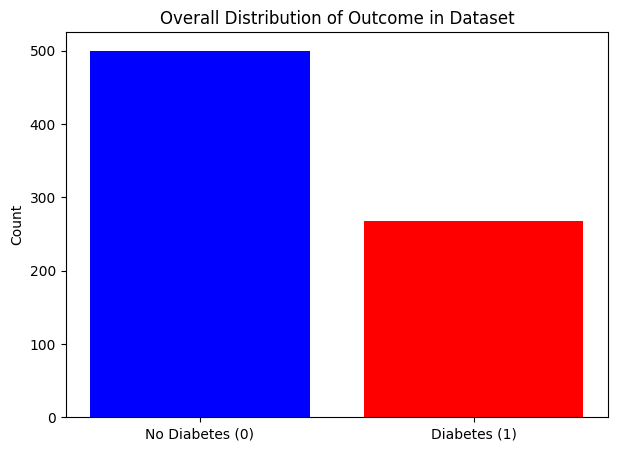

In [19]:
# Count the number of 1's and 0's in the entire dataset
overall_counts = df['Outcome'].value_counts()

# Plotting the distribution for the entire dataset
plt.figure(figsize=(7, 5))
plt.bar(overall_counts.index, overall_counts.values, color=['blue', 'red'])
plt.title('Overall Distribution of Outcome in Dataset')
plt.xticks([0, 1], ['No Diabetes (0)', 'Diabetes (1)'])
plt.ylabel('Count')
plt.show()


**EDA for Calculating any Outlier**

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
# Generate a statistical summary of the dataset
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


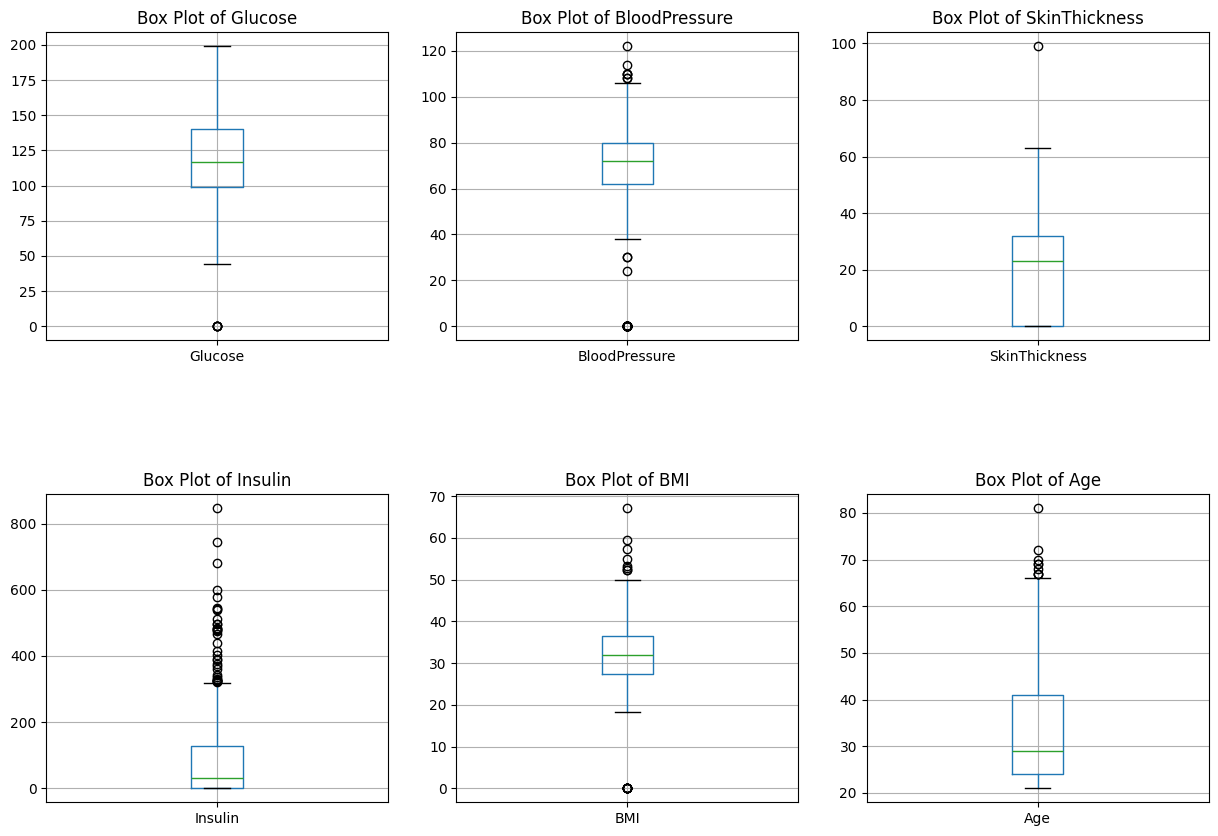

In [ ]:

# Box plots to identify outliers in the numerical columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# List of columns to plot
columns_to_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Creating box plots
for ax, column in zip(axes.flatten(), columns_to_plot):
    df.boxplot(column=column, ax=ax)
    ax.set_title(f'Box Plot of {column}')

plt.show()


**Handling Zero Values**

In [13]:
# Columns to impute
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Imputing zero values with the median of the respective columns
for column in columns_to_impute:
    median_value = df[df[column] != 0][column].median()
    df[column].replace(0, median_value, inplace=True)

# Show the new statistical summary to confirm changes
df.describe()

C:\Users\Al-Hussain Com\AppData\Local\Temp\ipykernel_65204\1156780882.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(0, median_value, inplace=True)
C:\Users\Al-Hussain Com\AppData\Local\Temp\ipykernel_65204\1156780882.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Further EDA**

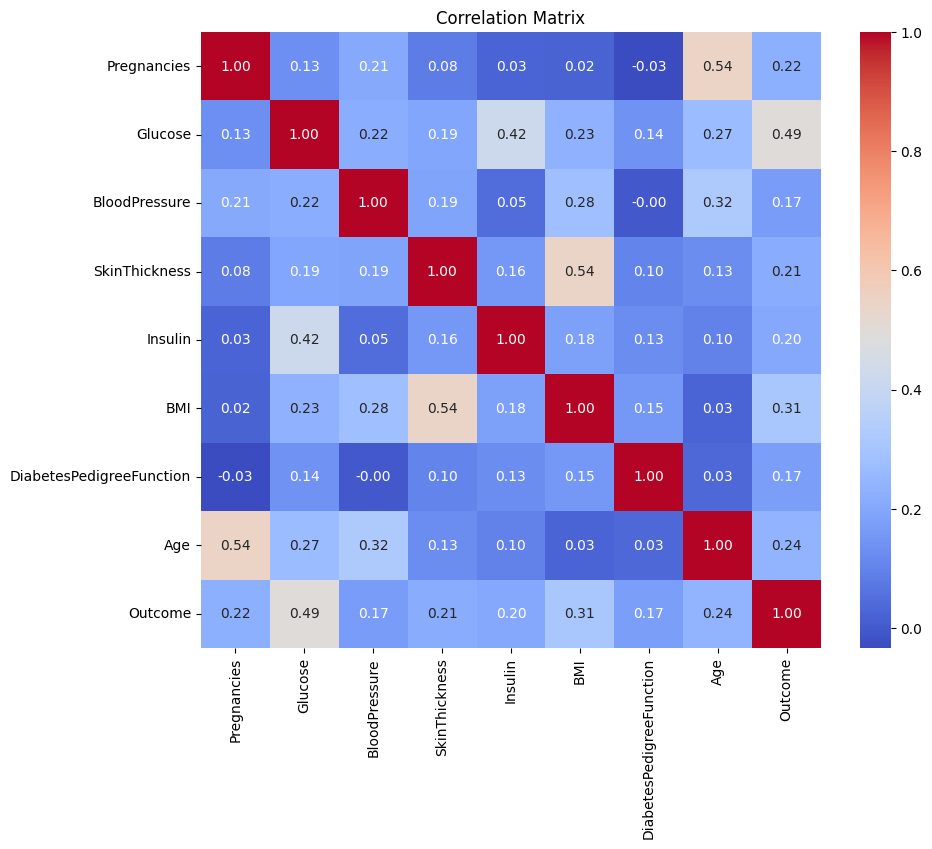

In [ ]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


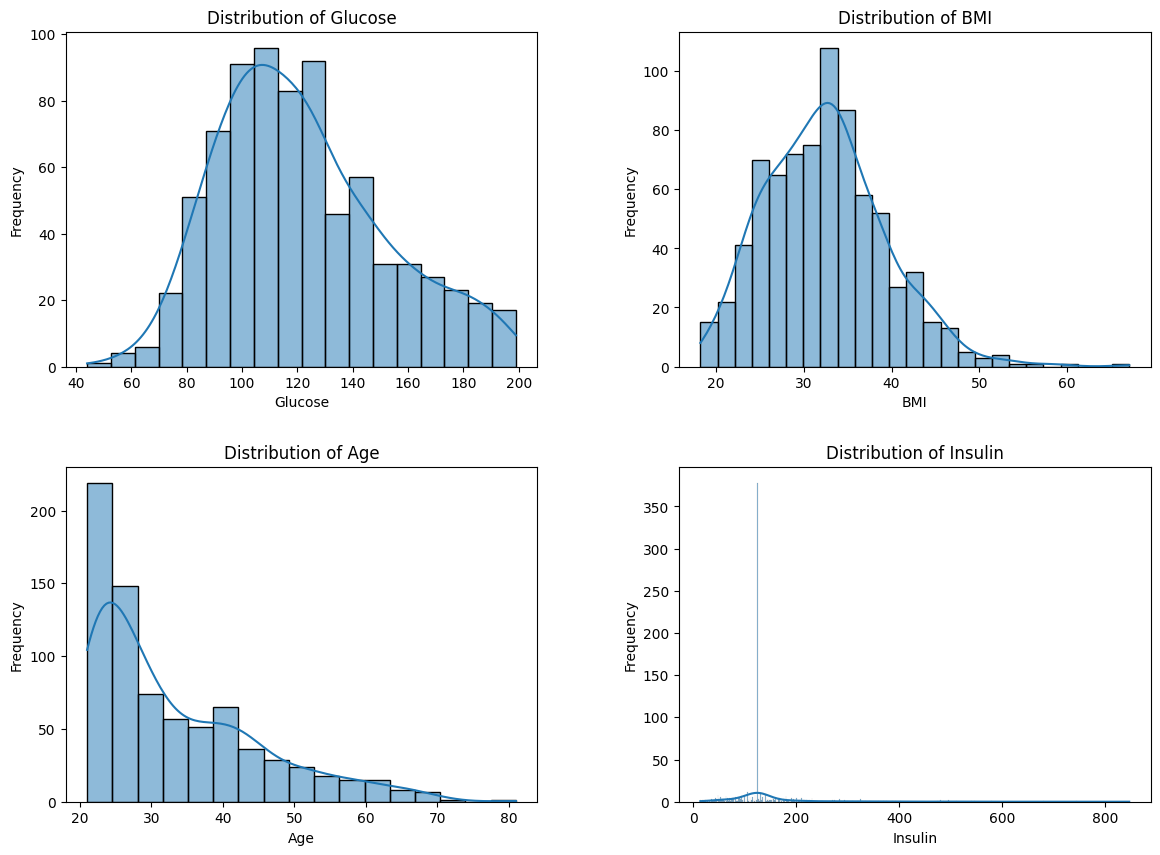

In [17]:
# Plot histograms for key variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# List of key columns for distribution analysis
key_columns = ['Glucose', 'BMI', 'Age', 'Insulin']

for ax, column in zip(axes.flatten(), key_columns):
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.show()


**Model Building**

In [ ]:

# Splitting the data into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model = LogisticRegression()

# Parameters grid: type of regularization and strength
param_grid = {
    'penalty': ['l1', 'l2'],  # Types of regularization
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear']  # Solver compatible with L1 regularization
}

In [23]:
# Setup GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [24]:
# Best parameters found
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the model with the best parameters on the testing set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_scaled, y_test)

best_params, best_score, test_accuracy


({'C': 1, 'penalty': 'l1', 'solver': 'liblinear'},
 0.7703985072637611,
 0.7532467532467533)

In [25]:
# Generate predictions on the test set
y_pred_best = best_model.predict(X_test_scaled)

# Classification report
classification_rep = classification_report(y_test, y_pred_best)

classification_rep

'              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.81        99\n           1       0.67      0.62      0.64        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.72      0.73       154\nweighted avg       0.75      0.75      0.75       154\n'

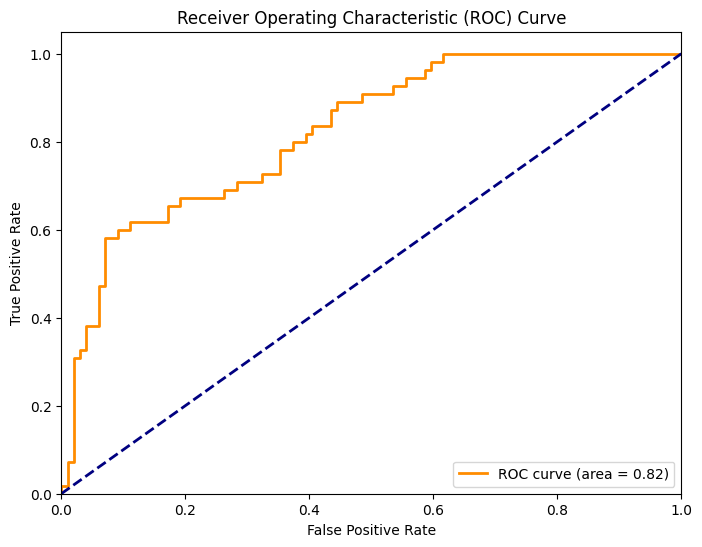

In [26]:

# Calculate probabilities for the positive class
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


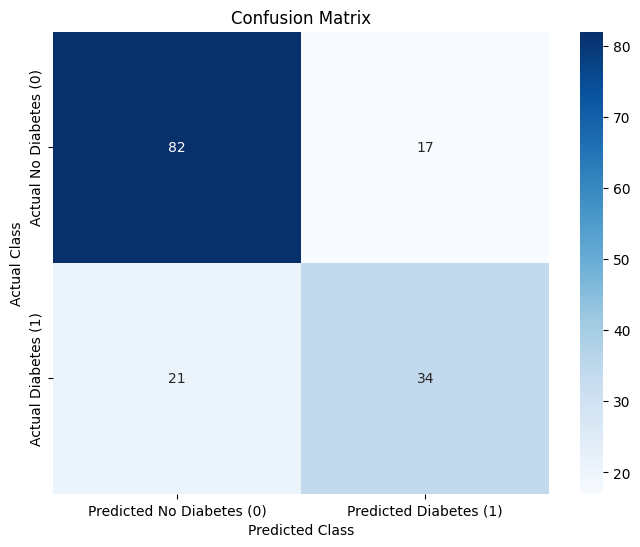

In [31]:


# Assuming y_pred_best contains the predictions from the best model
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted No Diabetes (0)', 'Predicted Diabetes (1)'], yticklabels=['Actual No Diabetes (0)', 'Actual Diabetes (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


In [33]:
def predict_diabetes_with_confidence(model, scaler, feature_input):
    import numpy as np

    # Make sure feature_input contains all the necessary features, for example:
    # [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
    
    # Convert the input to a NumPy array and reshape for a single sample
    feature_array = np.array(feature_input).reshape(1, -1)
    
    # Scale the features using the provided scaler
    scaled_features = scaler.transform(feature_array)
    
    # Make a prediction using the logistic regression model
    prediction = model.predict(scaled_features)
    
    # Get the probability of the prediction
    probability = model.predict_proba(scaled_features)[0, 1]
    
    # Determine the classification based on the prediction
    classification = "Diabetic" if prediction == 1 else "Non-Diabetic"
    
    # Return the classification and the probability (as a percentage)
    return classification, probability * 100

# Example usage:
user_input = [1, 148, 72, 35, 0, 33.6, 0.627, 50]  # Example input values including 'Pregnancies' if needed
classification, confidence = predict_diabetes_with_confidence(best_model, scaler, user_input)

print(f"Prediction: {classification}, Confidence: {confidence:.2f}%")


Prediction: Diabetic, Confidence: 71.97%


C:\Users\Al-Hussain Com\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
